In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import numpy as np
import pandas as pd

In [64]:
def custom_scatter_legend(x, colors, labels, dotsize=10, cmap='hls'):
    # We choose a color palette with seaborn.
#     palette = np.array(sns.color_palette("hls", 10))
#     palette = np.array(sns.color_palette(cmap, len(np.unique(colors))))
    palette = np.array(sns.color_palette(cmap, np.max(colors)+1))
#     palette = np.array(sns.color_palette(cmap, np.max(colors)+5))
#     np.random.shuffle(palette)

    # We create a scatter plot.
    f = plt.figure(figsize=(6, 6))
    ax = plt.subplot(aspect='equal')
    
#     sc = ax.scatter(x[:,0], x[:,1], lw=0, s=dotsize,
#                     c=palette[colors.astype(np.int)])
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=dotsize,
                    c=palette[colors.astype(np.int)], marker='o')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    
    # Legend
    legend_artists = []
    for n, label in enumerate(labels):
        h = plt.scatter(0, 0, s=dotsize, lw=0, c=palette[n])
        legend_artists.append(h)

#     plt.legend(legend_artists, labels, scatterpoints=1, loc='upper right', ncol=1, fontsize=10)
    lgnd = plt.legend(legend_artists, labels, scatterpoints=1, bbox_to_anchor=(1.05, 1), loc=2, ncol=1, fontsize=10)
    # Change legend marker size
    for i in range(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [30]

    return f, ax, sc, txts

In [59]:
proj100_800 = np.load('./vizdata/tsne_output/instbalance_800_tsne_100_50_5000.npz')

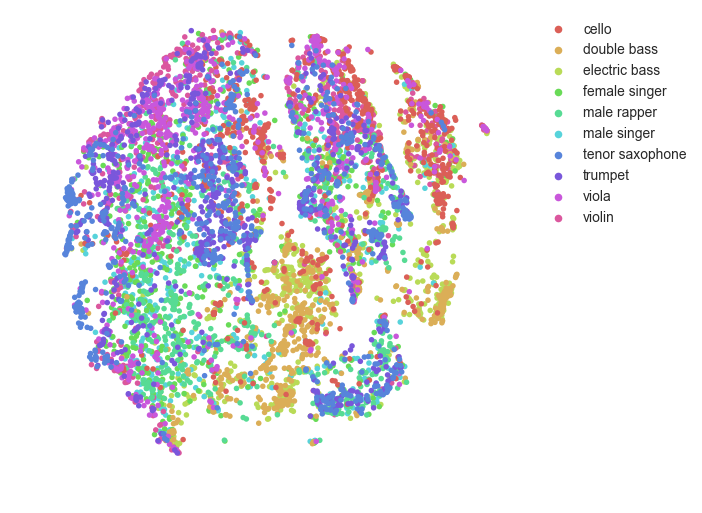

In [60]:
fig, _, _, _ = custom_scatter_legend(proj100_800['tsne'], proj100_800['ysub_inst'], 
                                     proj100_800['instruments'], dotsize=16, cmap='hls');

In [61]:
fig.savefig('./plots/tsne_instbalance_800_tsne_100_50_5000_all.pdf')

In [7]:
pd.DataFrame([proj100_800['instruments'][i] for i in proj100_800['ysub_inst']], 
             columns=['inst'])['inst'].value_counts()

viola              733
cello              728
trumpet            706
tenor saxophone    694
electric bass      689
violin             666
double bass        662
female singer      656
male singer        611
male rapper        561
Name: inst, dtype: int64

## Joint plot

In [102]:
def custom_scatter_subplot_legend(x, colors, labels, ax, muted=[], dotsize=10, cmap='hls'):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette(cmap, np.max(colors)+1))
    for m in muted:
        palette[m] = [0.8, 0.8, 0.8]

    # We create a scatter plot.
#     f = plt.figure(figsize=(6, 6))
#     ax = plt.subplot(aspect='equal')
    
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=dotsize,
                    c=palette[colors.astype(np.int)], marker='o')
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    
#     # Legend
#     legend_artists = []
#     for n, label in enumerate(labels):
#         h = plt.scatter(0, 0, s=dotsize, lw=0, c=palette[n])
#         legend_artists.append(h)

# #     plt.legend(legend_artists, labels, scatterpoints=1, loc='upper right', ncol=1, fontsize=10)
#     lgnd = plt.legend(legend_artists, labels, scatterpoints=1, bbox_to_anchor=(1.05, 1), loc=2, ncol=1, fontsize=10)
#     # Change legend marker size
#     for i in range(len(lgnd.legendHandles)):
#         lgnd.legendHandles[i]._sizes = [30]

    return f, ax, sc, txts

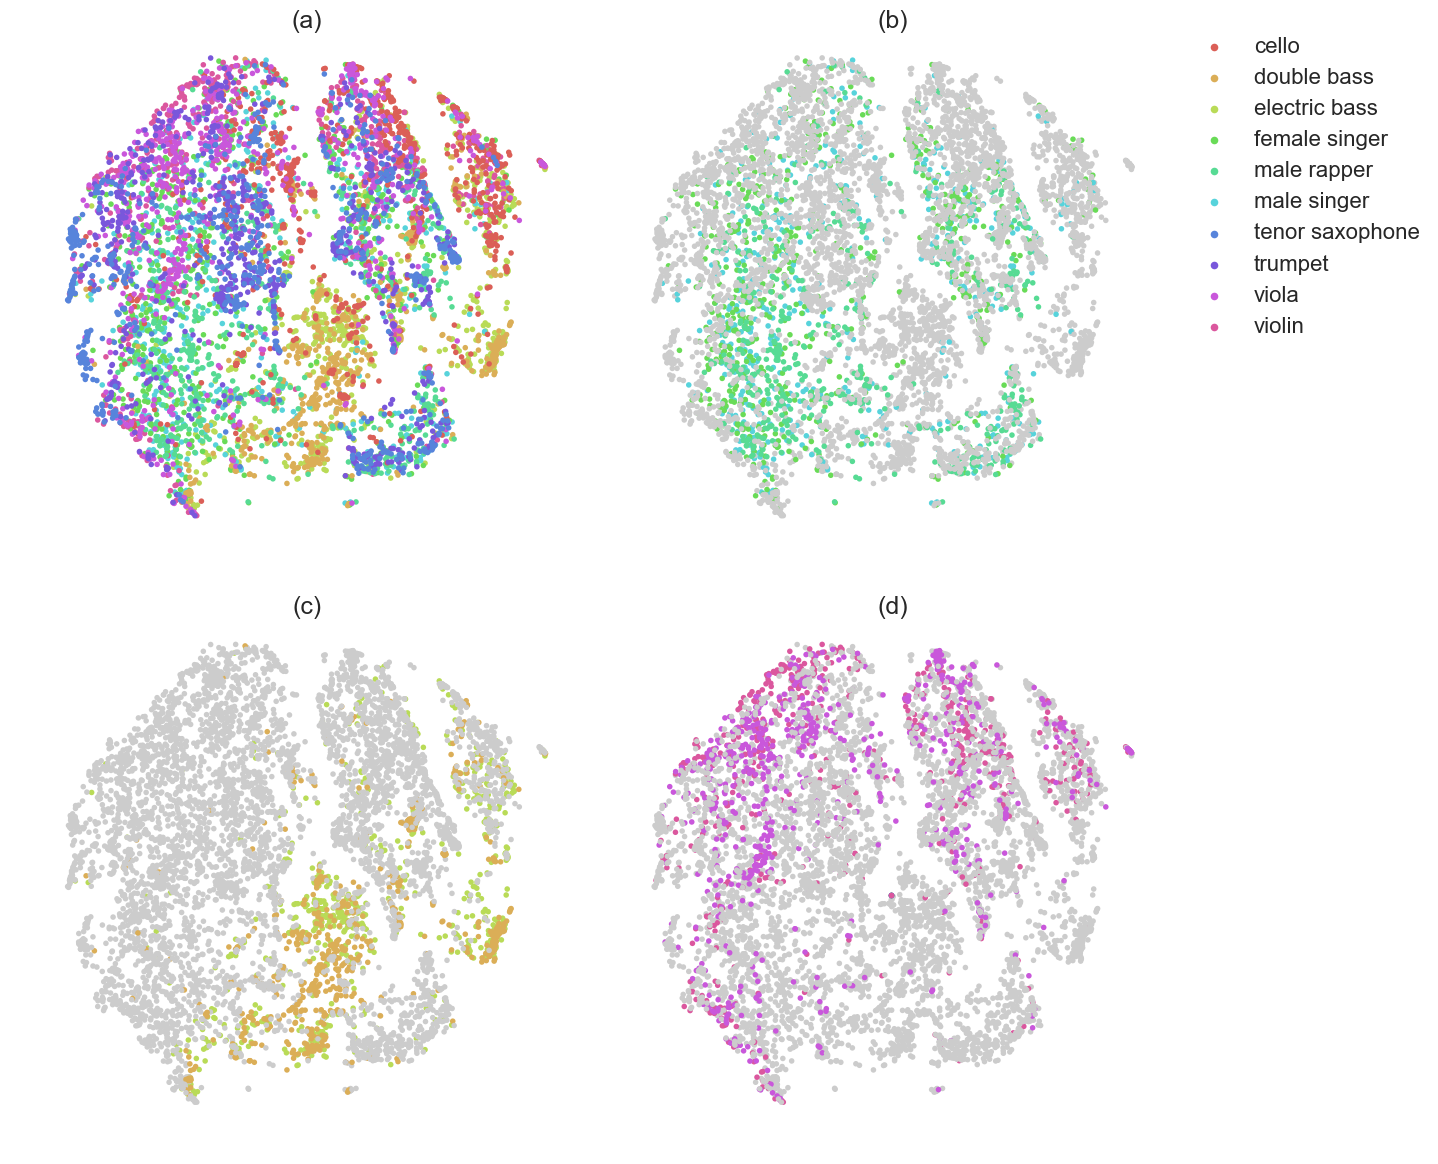

In [103]:
fig = plt.figure(figsize=(12,12))

# ALL
ax1 = fig.add_subplot(221)
custom_scatter_subplot_legend(proj100_800['tsne'], proj100_800['ysub_inst'], 
                              proj100_800['instruments'], ax1, dotsize=16, cmap='hls');
plt.title('(a)')

# VOCAL
ax2 = fig.add_subplot(222)
custom_scatter_subplot_legend(proj100_800['tsne'], proj100_800['ysub_inst'], 
                              proj100_800['instruments'], ax2, muted=[0, 1, 2, 6, 7, 8, 9], dotsize=16, cmap='hls');
plt.title('(b)')

# BASS
ax3 = fig.add_subplot(223)
custom_scatter_subplot_legend(proj100_800['tsne'], proj100_800['ysub_inst'], 
                              proj100_800['instruments'], ax3, muted=[0, 3, 4, 5, 6, 7, 8, 9], dotsize=16, cmap='hls');
plt.title('(c)')

# VIOLIN + VIOLA
ax4 = fig.add_subplot(224)
custom_scatter_subplot_legend(proj100_800['tsne'], proj100_800['ysub_inst'], 
                              proj100_800['instruments'], ax4, muted=[0, 1, 2, 3, 4, 5, 6, 7], dotsize=16, cmap='hls');
plt.title('(d)')

# Legend
palette = np.array(sns.color_palette('hls', 10))
labels = proj100_800['instruments']
legend_dotsize=16
legend_artists = []
for n, label in enumerate(labels):
    h = plt.scatter(0, 0, s=legend_dotsize, lw=0, c=palette[n])
    legend_artists.append(h)

#     plt.legend(legend_artists, labels, scatterpoints=1, loc='upper right', ncol=1, fontsize=10)
lgnd = plt.legend(legend_artists, labels, scatterpoints=1, bbox_to_anchor=(1.03, 2.2), loc=2, ncol=1, fontsize=16)
# Change legend marker size
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
    
plt.tight_layout()

In [101]:
fig.savefig('./plots/tsne_instbalance_800_tsne_100_50_5000_subplots.pdf', bbox_inches='tight')

In [104]:
len(proj100_800['ysub_inst'])

6706